## 6.1 ベータを手がかりに業界の特徴を見る

### コード 6.1 ローリング・ウィンドウでベータを推定し，それを描画する

        ticker  open  high   low  close    volume      share     return  \
month                                                                     
1991-01  A0001  1571  1605  1503   1533    109323   19856748   4.285714   
1991-01  I0098  1915  1915  1889   1909   2189330   52683960  -3.194726   
1991-01  O0061  1290  1338  1285   1285   8529441  174716080  -1.001541   
1991-01  I0097  1919  1919  1882   1893     95192   21709732 -15.264100   
1991-01  O0065  4611  4629  4573   4614   2413791    8150402   0.151943   
...        ...   ...   ...   ...    ...       ...        ...        ...   
2014-12  A0019  4423  4423  4423   4423    108181    4742033   5.611270   
2014-12  Q0009   499   499   499    499  44304794    2423154  17.966900   
2014-12  L0114  1604  1604  1599   1604    833970   16770334   8.451656   
2014-12  Y0059  2540  2540  2540   2540   6110407   19317930   1.154918   
2014-12  Z0137   644   647   644    647   3100847   65976380  16.576580   

        industry  qme qb

Text(20.625, 0.5, 'beta')

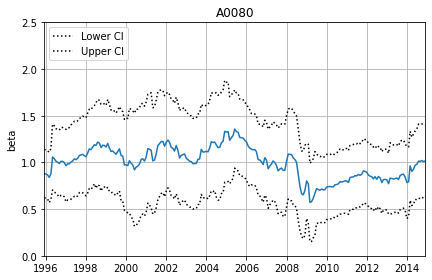

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

stockMonthly = pd.read_csv('./data/stockMonthly.csv', parse_dates=['month'])
stockMonthly['month'] = stockMonthly['month'].dt.to_period('M')
stockMonthly = stockMonthly.set_index('month').sort_index()

ffMonthly = pd.read_csv('./data/ffMonthly.csv', parse_dates=['month'])
ffMonthly['month'] = ffMonthly['month'].dt.to_period('M')
ffMonthly = ffMonthly.set_index('month').sort_index()

stockMonthly = stockMonthly.merge(ffMonthly, how='inner', on='month')
print(stockMonthly)

code = 'A0080'  # A0080 or B0030を選択
df = stockMonthly[stockMonthly['ticker'] == code]
y = df['return'] - df['RF']
x = df['RMRF']
model = RollingOLS(y, sm.add_constant(x), window=60)
res = model.fit()
params = res.params
fig = res.plot_recursive_coefficient(variables=['RMRF'])
# figは図全体のオブジェクトで、内部には複数のsubplotを持てるが、
# 今回は1つのsubplotのみで構成されているので、そのsubplotは
# fig.axes[0]で取得できる。
ax = fig.axes[0]
ax.grid()
ax.set_title(f'{code}')
ax.set_ylim(0, 2.5)
ax.set_ylabel('beta')